<a href="https://colab.research.google.com/github/luckyokta/plant_growth/blob/main/plant_growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# import library
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [32]:
# load dataset
df = pd.read_csv("plant_growth_data.csv")
df.head(5)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [33]:
# check the number of rows
df.shape

(193, 7)

In [34]:
#  check duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.shape)

(0, 7)


In [35]:
# check missing value
print(df.isnull().sum())

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64


<Axes: xlabel='Sunlight_Hours'>

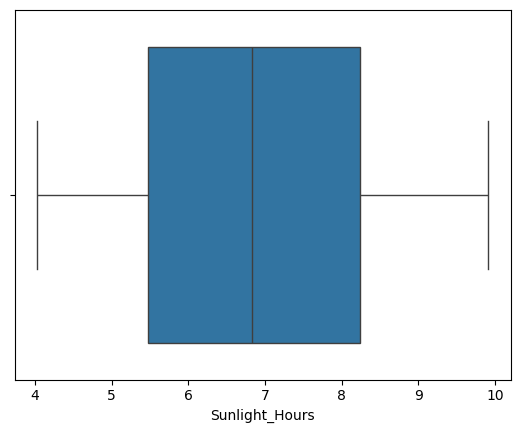

In [36]:
# detecting outliers
sns.boxplot(x=df["Sunlight_Hours"])

<Axes: xlabel='Temperature'>

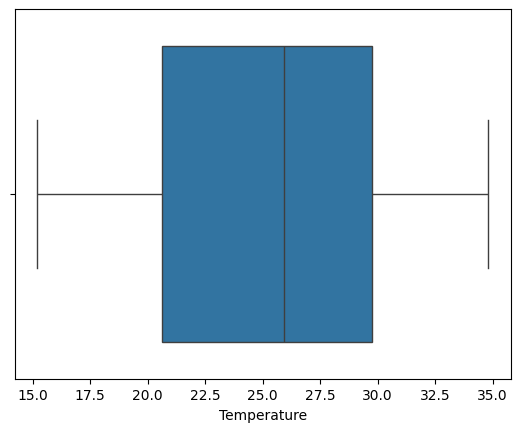

In [37]:
sns.boxplot(x=df["Temperature"])

<Axes: xlabel='Humidity'>

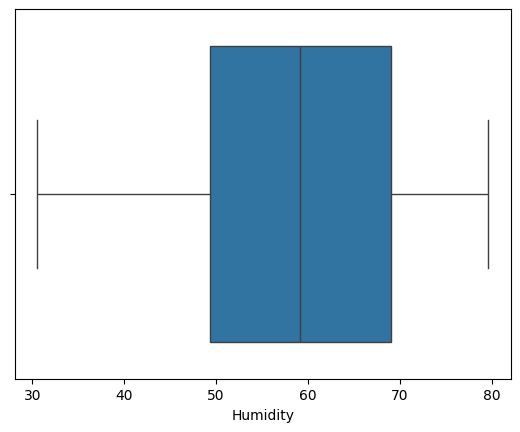

In [38]:
sns.boxplot(x=df["Humidity"])

In [39]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 6].values

In [40]:
# one-hot encoding to convert categorical value into numeric
one_hot = pd.get_dummies(df[["Soil_Type", "Water_Frequency", "Fertilizer_Type"]], drop_first=False)
one_hot.head()

,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,False,True,False,True,False,False,True,False,False
1,False,False,True,False,False,True,False,False,True
2,False,True,False,True,False,False,False,True,False
3,False,True,False,True,False,False,False,True,False
4,False,False,True,True,False,False,False,False,True


In [41]:
# drop features from original dataset
df = df.drop(["Soil_Type", "Water_Frequency", "Fertilizer_Type"], axis = 1)
x = pd.concat([one_hot, df], axis = 1)
x.head()

,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
0,False,True,False,True,False,False,True,False,False,5.192294,31.719602,61.591861,0
1,False,False,True,False,False,True,False,False,True,4.033133,28.919484,52.422276,1
2,False,True,False,True,False,False,False,True,False,8.892769,23.179059,44.660539,0
3,False,True,False,True,False,False,False,True,False,8.241144,18.465886,46.433227,0
4,False,False,True,True,False,False,False,False,True,8.374043,18.128741,63.625923,0


In [42]:
#  split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# training
model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [43]:
# make predictions
y_pred = model.predict(x_test)

# check accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))


Accuracy:  1.0


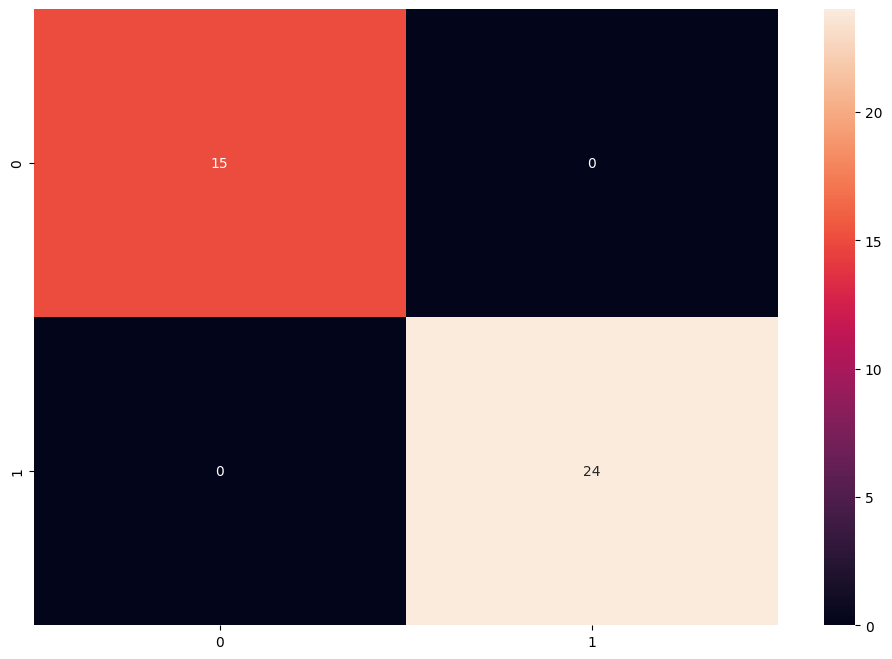

In [44]:
# confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.show()